# <font color ='545aa7'> Chapter 7: Image Processing & Analysis </font>

From **Scientific Computing for Chemists** by Charles Weiss. The document is copyright © 2021 Charles J. Weiss and is released under under the [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import skimage

## 7.1 Basic Image Structure
### 7.1.1 Loading Images

In [17]:
from skimage import data, io, color

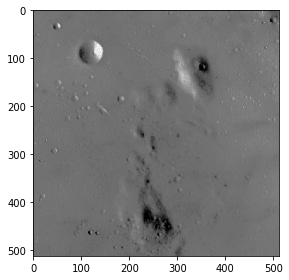

In [18]:
moon = data.moon()
io.imshow(moon)

In [19]:
moon

array([[116, 116, 122, ...,  93,  96,  96],
       [116, 116, 122, ...,  93,  96,  96],
       [116, 116, 122, ...,  93,  96,  96],
       ...,
       [109, 109, 112, ..., 117, 116, 116],
       [114, 114, 113, ..., 118, 118, 118],
       [114, 114, 113, ..., 118, 118, 118]], dtype=uint8)

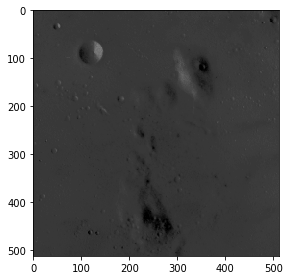

In [20]:
moon_dark = moon // 2
io.imshow(moon_dark)

### 7.1.2 Color Images

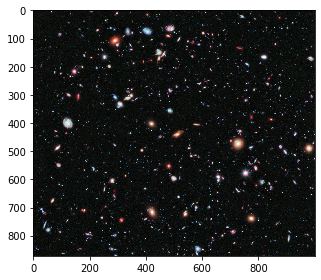

In [21]:
hubble = data.hubble_deep_field()
io.imshow(hubble)

In [22]:
hubble

array([[[15,  7,  4],
        [15,  9,  9],
        [ 9,  4,  8],
        ...,
        [18, 11,  5],
        [16, 19, 10],
        [15, 10,  6]],

       [[ 2,  7,  0],
        [ 5, 11,  7],
        [13, 19, 17],
        ...,
        [11, 10,  5],
        [13, 18, 11],
        [ 9, 11,  6]],

       [[10, 15,  9],
        [13, 18, 14],
        [18, 22, 23],
        ...,
        [ 1,  2,  0],
        [14, 15, 10],
        [ 8, 14, 10]],

       ...,

       [[19, 20, 14],
        [15, 15, 13],
        [13, 13, 13],
        ...,
        [ 2,  6,  5],
        [12, 14, 13],
        [ 7,  9,  8]],

       [[13, 10,  5],
        [ 9, 11,  8],
        [12, 18, 16],
        ...,
        [ 5,  9,  8],
        [ 6, 12, 10],
        [ 7, 13,  9]],

       [[21, 16, 12],
        [10, 12,  9],
        [ 9, 20, 16],
        ...,
        [11, 15, 14],
        [ 9, 18, 15],
        [ 7, 18, 12]]], dtype=uint8)

In [23]:
io.imshow(hubble[:,:,0])

### 7.1.3 External Images

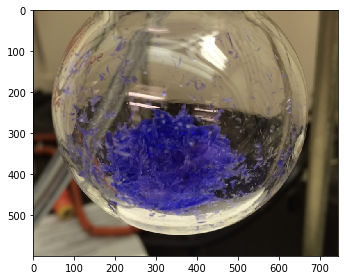

In [24]:
flask = io.imread('flask.png')
io.imshow(flask)

In [25]:
flask

array([[[102,  86,  60, 255],
        [107,  90,  63, 255],
        [113,  95,  67, 255],
        ...,
        [ 88,  72,  46, 255],
        [ 90,  74,  48, 255],
        [ 92,  76,  50, 255]],

       [[103,  87,  61, 255],
        [107,  90,  63, 255],
        [112,  95,  67, 255],
        ...,
        [ 88,  72,  46, 255],
        [ 90,  74,  48, 255],
        [ 93,  77,  51, 255]],

       [[101,  85,  59, 255],
        [107,  90,  62, 255],
        [112,  95,  67, 255],
        ...,
        [ 88,  72,  46, 255],
        [ 91,  75,  49, 255],
        [ 93,  77,  51, 255]],

       ...,

       [[161, 156, 136, 255],
        [161, 156, 136, 255],
        [161, 156, 136, 255],
        ...,
        [ 18,  15,  10, 255],
        [ 19,  16,   9, 255],
        [ 20,  17,  10, 255]],

       [[160, 155, 135, 255],
        [161, 156, 136, 255],
        [161, 156, 136, 255],
        ...,
        [ 18,  15,  10, 255],
        [ 18,  15,   9, 255],
        [ 20,  17,  10, 255]],

       [[160

### 7.1.4 Colormaps

In [26]:
import matplotlib.pyplot as plt
plt.imshow(hubble[:,:,0])
plt.colorbar()

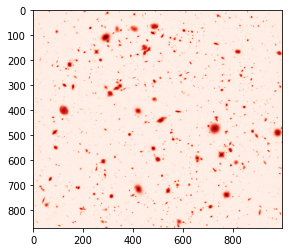

In [27]:
plt.imshow(hubble[:,:,0], cmap='Reds')

### 7.1.5 Saving Images

In [28]:
io.imsave('new_img.png', hubble)

## 7.2 Basic Image Manipulation
### 7.2.1 Colors

In [29]:
hubble_gray = color.rgb2gray(hubble)
hubble_gray

array([[0.03326941, 0.04029412, 0.02098392, ..., 0.04727412, 0.0694651 ,
        0.04225137],
       [0.0213051 , 0.03700627, 0.06894431, ..., 0.03863529, 0.06444235,
        0.04005686],
       [0.05296039, 0.06529059, 0.08322392, ..., 0.00644431, 0.05657647,
        0.04877098],
       ...,
       [0.07590157, 0.05825804, 0.05098039, ..., 0.01991333, 0.05295255,
        0.03334471],
       [0.04030196, 0.04062235, 0.06502275, ..., 0.03167804, 0.04149333,
        0.04484941],
       [0.06578078, 0.04454392, 0.06813373, ..., 0.05520745, 0.06224   ,
        0.0597251 ]])

### 7.2.2 Encoding

In [30]:
import skimage
skimage.dtype_limits(hubble_gray)

(-1, 1)

In [31]:
hubble_gray_unint8 = skimage.img_as_ubyte(hubble_gray)
skimage.dtype_limits(hubble_gray_unint8)

(0, 255)

### 7.2.3 Image Contrast

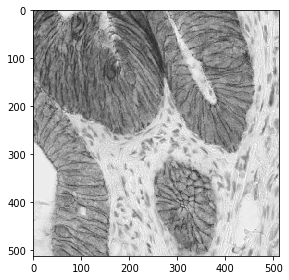

In [32]:
chem = data.immunohistochemistry()
chem_gray = color.rgb2gray(chem)
io.imshow(chem_gray)

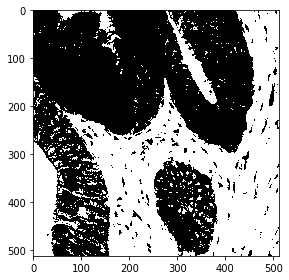

In [33]:
chem_bw = skimage.img_as_ubyte(chem_gray > 0.65)
# above generates a boolean encoding
io.imshow(chem_bw)

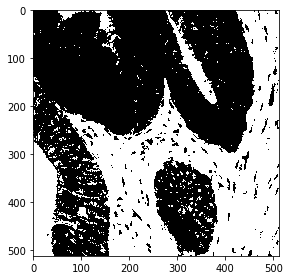

In [34]:
from skimage import filters
threshold = filters.threshold_otsu(chem_gray)
chem_otsu = skimage.img_as_ubyte(chem_gray > threshold)
io.imshow(chem_otsu)

Text(0, 0.5, 'Counts')

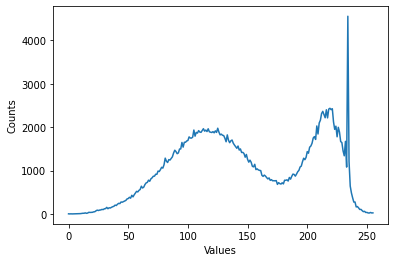

In [35]:
from skimage import exposure
hist = exposure.histogram(chem_gray)
plt.plot(hist[0])
plt.xlabel('Values')
plt.ylabel('Counts')

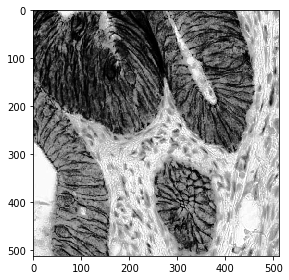

In [36]:
chem_eq = exposure.equalize_hist(chem_gray)
io.imshow(chem_eq)

Text(0, 0.5, 'Counts')

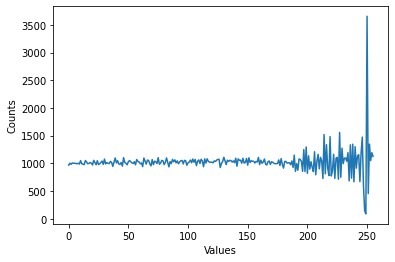

In [37]:
hist = exposure.histogram(chem_eq)
plt.plot(hist[0])
plt.xlabel('Values')
plt.ylabel('Counts')

## 7.3 Scikit-Image Examples
### 7.3.1 Blob Detection

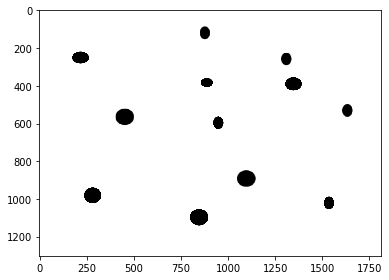

In [38]:
dots = io.imread('dots.png')
io.imshow(dots)

<ipython-input-39-ba554d83df3d>:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  dots_inverted = color.rgb2gray(255 - dots)


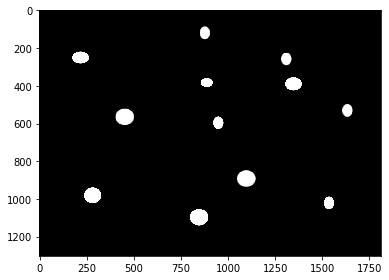

In [39]:
dots_inverted = color.rgb2gray(255 - dots)
io.imshow(dots_inverted)

In [40]:
from skimage import feature
blobs = feature.blob_dog(dots_inverted, threshold=0.5)
blobs

array([[1096.        ,  847.        ,   42.94967296],
       [ 565.        ,  453.        ,   42.94967296],
       [ 892.        , 1097.        ,   42.94967296],
       [ 980.        ,  283.        ,   42.94967296],
       [ 391.        , 1346.        ,   26.8435456 ],
       [ 251.        ,  219.        ,   26.8435456 ],
       [1021.        , 1534.        ,   26.8435456 ],
       [ 596.        ,  949.        ,   26.8435456 ],
       [ 531.        , 1632.        ,   26.8435456 ],
       [ 120.        ,  877.        ,   26.8435456 ],
       [ 258.        , 1308.        ,   26.8435456 ],
       [ 383.        ,  888.        ,   26.8435456 ]])

In [41]:
len(blobs)

12

### 7.3.2 Entropy Analysis

In [42]:
from skimage.morphology import disk
from skimage.filters.rank import entropy
selem = disk(5)
selem

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=uint8)

/Users/Demos/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


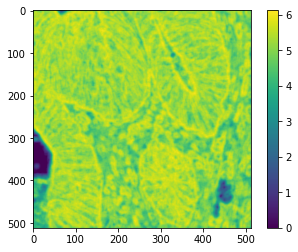

In [43]:
S = entropy(chem_gray, selem)
plt.imshow(S)
plt.colorbar()

### 7.3.3 Eccentricity

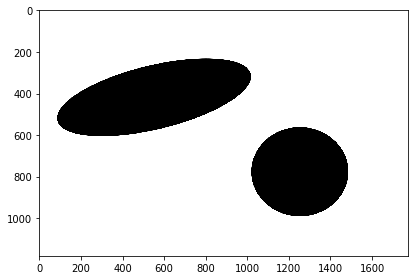

In [44]:
ovals = io.imread('ovals.png')
io.imshow(ovals)

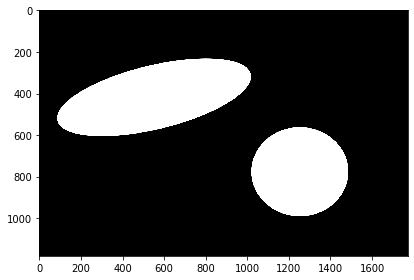

In [45]:
ovals_invert = color.rgb2gray(255 - ovals[:,:,:-1])
io.imshow(ovals_invert)

In [46]:
from skimage.measure import label, regionprops
lbl = label(ovals_invert)
props = regionprops(lbl)

In [47]:
props[0].eccentricity

0.9469273936534165

In [48]:
props[1].eccentricity

0.39666071911271933

## Exercises
### Basic Image Operations

1. Import the image titled **NaK_THF.jpg** using scikit-image.

a) Convert the image to grayscale using a scikit-image function. 

b) Save the grayscale image using the `io` module.

2. Load the **chelsea** image from the scikit-image `data` module and convert it to grayscale. Display the image using the scikit-image plotting function and display it a second time using a matplotlib plotting function. Why do they look different?

3. Save a 1000 × 1000 pixel image containing random noise generated by the NumPy `np.random.randn()` function. Display the image in a Jupyter notebook along with a histogram of the pixel values.

4. Write your own Python function for converting a color image to grayscale. Then find the source code for the scikit-image `rgb2gray()` function available on the scikit- image website and compare it to your own function. Are there any major differences between your function and the scikit-image function?

5. Import an image of your choice either from the data module or of your own and convert it to a grayscale image.

a) Invert the grayscale image using NumPy by subtracting all values from the maximum possible value

b) Invert the original grayscale image using the `invert()` function in the scikit- image `util` module

6. Import a color image of your choice either from the `data` module or of your own and calculate the sum of all pixels from each of the three color channels (RGB). Which color (red, green, or blue) is most prevalent in your image?

### Image Analysis

7. The folder titled **glow_stick** contains a series of images taken of a glow stick over the course of approximately thirteen hours along with a CSV file containing the times at which each image was taken in numerical order. Quantify the brightness of each image and generate a plot of brightness versus time.

8. The JPG image file format commonly used for photographs degrades images during the saving process due to the lossy compression algorithm while the PNG image file format does not degrade images with its lossless compression algorithm.

a) To view how JPG distorts images, import the **nmr.png** and **nmr.jpg** images of the same NMR spectrum. Subtract the two images from each other and visualize this difference to see the image distortions caused by JPG compression.

b) Which of the above file formats is better for image-based data in terms of data integrity?

9. Import the image **spots.png** and determine the number of spots in the image using scikit-image. Plot the coordinates of the spots you find with red x’s over the image to confirm your results. If your script missed any spots, speculate as to why those spots were missed.

10. The image **test_tube_altered.png** has been altered using photo editing software. Generate and plot an entropy map of the image to identify the altered regions.

11. Steganography is the practice of hiding information in an image or digital file to avoid detection. The file **hidden_image.png** was created by combining an image with pseudorandom noise to mask the original image. Perform an entropy analysis on the image to reveal the original image. You may need to adjust the size of the selection element (selem) to detect the hidden image.